

*   Preprocessing:Feature Selection,normalization, Balancing

*   Model Selection & Parameter Tuning
*   Model Evaluation   



In [ ]:
import pandas as pd
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
#Calculating the number of records
df.shape

(303, 14)

In [ ]:
#Feature Selection:
#Put the input features in x and keep the ouput in Y

x = df[['age','sex','cp','trtbps','chol','fbs','restecg','thalachh','exng','oldpeak','slp','caa','thall']]
y = df['output']

In [ ]:
print(x)
print(y)

     age  sex  cp  trtbps  chol  fbs  ...  thalachh  exng  oldpeak  slp  caa  thall
0     63    1   3     145   233    1  ...       150     0      2.3    0    0      1
1     37    1   2     130   250    0  ...       187     0      3.5    0    0      2
2     41    0   1     130   204    0  ...       172     0      1.4    2    0      2
3     56    1   1     120   236    0  ...       178     0      0.8    2    0      2
4     57    0   0     120   354    0  ...       163     1      0.6    2    0      2
..   ...  ...  ..     ...   ...  ...  ...       ...   ...      ...  ...  ...    ...
298   57    0   0     140   241    0  ...       123     1      0.2    1    0      3
299   45    1   3     110   264    0  ...       132     0      1.2    1    0      3
300   68    1   0     144   193    1  ...       141     0      3.4    1    2      3
301   57    1   0     130   131    0  ...       115     1      1.2    1    1      3
302   57    0   1     130   236    0  ...       174     0      0.0    1    1

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df)

     age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
5     57    1   0     140   192    0        1       148     0      0.4    1   
6     56    0   1     140   294    0        0       153     0      1.3    1   
7     44    1   1     120   263    0        1       173     0      0.0    2   
8     52    1   2     172   199    1        1       162     0      0.5    2   
9     57    1   2     150   168    0        1       174     0      1.6    2   
10    54    1   0     140   239    0        1       160     0      1.2    2   
11    48    0   2     130   275    0        1       

In [ ]:
#To select the minimum set of input features, I need to calculate the Pearson Correlation Coefficient among features
x.corr()
"""#All features have low correlation so we can keep all of them"""

'#All features have low correlation so we can keep all of them'

In [ ]:
#Normalization
x.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,0.528465,0.683168,0.322332,0.354941,0.274575,0.148515,0.264026,0.600358,0.326733,0.167678,0.699670,0.182343,0.771177
std,0.189210,0.466011,0.344017,0.165454,0.118335,0.356198,0.262930,0.174849,0.469794,0.187270,0.308113,0.255652,0.204092
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.385417,0.000000,0.000000,0.245283,0.194064,0.000000,0.000000,0.477099,0.000000,0.000000,0.500000,0.000000,0.666667
50%,0.541667,1.000000,0.333333,0.339623,0.260274,0.000000,0.500000,0.625954,0.000000,0.129032,0.500000,0.000000,0.666667
75%,0.666667,1.000000,0.666667,0.433962,0.339041,0.000000,0.500000,0.725191,1.000000,0.258065,1.000000,0.250000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
for column in x.columns:
    feature = np.array(x[column]).reshape(-1,1)
    scaler = MinMaxScaler()
    scaler.fit(feature)
    feature_scaled = scaler.transform(feature)
    x[column] = feature_scaled.reshape(1,-1)[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

In [ ]:
#Split the dataset in Training and Test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
#Balancing :checking whether the dataset is balanced or not
print(y_train.value_counts())
print(y_test.value_counts())

1    133
0    109
Name: output, dtype: int64
1    32
0    29
Name: output, dtype: int64


In [ ]:
from imblearn.over_sampling import RandomOverSampler
over_sampler = RandomOverSampler(random_state=42)
x_bal_over, y_bal_over = over_sampler.fit_resample(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print(np.unique(y_bal_over,return_counts=True))

(array([0, 1]), array([133, 133]))


In [ ]:
from imblearn.under_sampling import RandomUnderSampler
under_sampler = RandomUnderSampler(random_state=42)
x_bal_under, y_bal_under = under_sampler.fit_resample(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print(np.unique(y_bal_under,return_counts=True))
y_bal_under.shape #!!!!!!!!!! Check the How

(array([0, 1]), array([109, 109]))


(218,)

In [ ]:
#Model Selection and Training
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=2)
model.fit(x_train,y_train)
y_score = model.predict_proba(x_test)

In [ ]:
y_score

array([[1. , 0. ],
       [0.5, 0.5],
       [0. , 1. ],
       [1. , 0. ],
       [0.5, 0.5],
       [0. , 1. ],
       [0.5, 0.5],
       [1. , 0. ],
       [1. , 0. ],
       [0.5, 0.5],
       [0. , 1. ],
       [0.5, 0.5],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.5, 0.5],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.5, 0.5],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.5, 0.5],
       [1. , 0. ],
       [0.5, 0.5],
       [0. , 1. ],
       [0.5, 0.5],
       [0.5, 0.5],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0.5, 0.5],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0.5, 0.5],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. ,

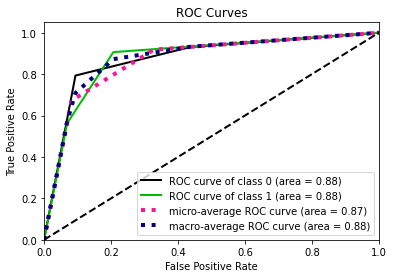

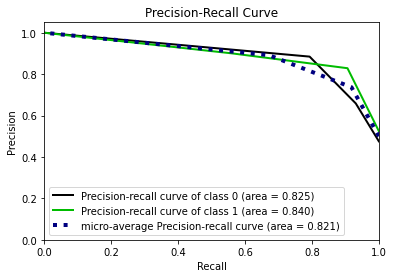

In [ ]:
#Performance:
!pip install scikit-plot
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from scikitplot.metrics import plot_roc,auc
from scikitplot.metrics import plot_precision_recall

fpr0,tpr0,thresholds =roc_curve(y_test, y_score[:,1])

#plot the metrics
plot_roc(y_test, y_score)
plt.show()

plot_precision_recall(y_test, y_score)
plt.show()

# New Section
Roc : Probability Curve
 It is one of the most important evaluation metrics for checking any classification model’s performance

It tells how much the model is capable of distinguishing between classes
Higher the AUC, the better the model is at predicting 0s as 0s and 1s as 1s. By analogy, the Higher the AUC, the better the model is at distinguishing between patients with the disease and no disease.

In a multi-class model, we can plot N number of AUC ROC Curves for N number classes using the One vs ALL methodology. So for example, If you have three classes named X, Y, and Z, you will have one ROC for X classified against Y and Z, another ROC for Y classified against X and Z, and the third one of Z classified against Y and X.

Recalculating with resampled balance

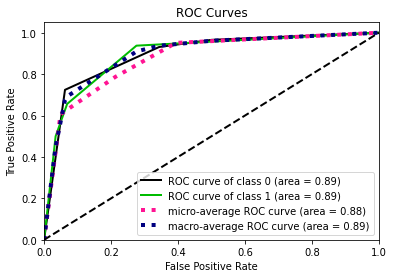

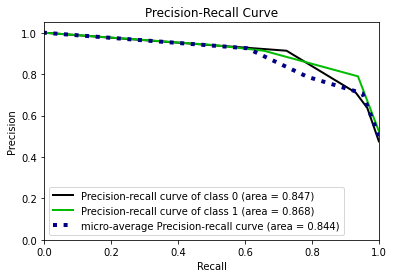

In [ ]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_bal_over, y_bal_over)
y_score = model.predict_proba(x_test)
fpr0, tpr0, thresholds = roc_curve(y_test, y_score[:, 1])
# Plot metrics
plot_roc(y_test, y_score)
plt.show()

plot_precision_recall(y_test, y_score)
plt.show()

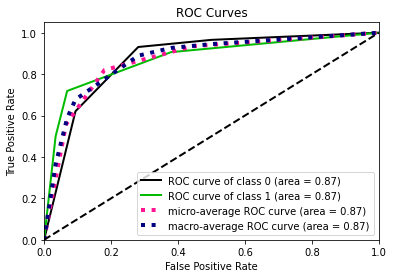

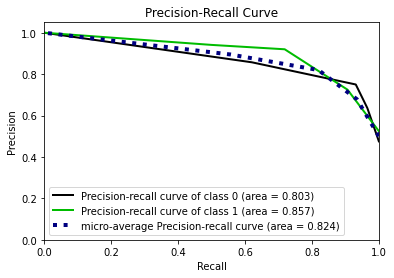

In [ ]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_bal_under, y_bal_under)
y_score = model.predict_proba(x_test)
fpr0, tpr0, thresholds = roc_curve(y_test, y_score[:, 1])
# Plot metrics
plot_roc(y_test, y_score)
plt.show()

plot_precision_recall(y_test, y_score)
plt.show()

In [ ]:
#Parameters Tuning
from sklearn.model_selection import GridSearchCV
model = KNeighborsClassifier()
param_grid = {
   'n_neighbors': np.arange(2,8),
   'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'metric' : ['euclidean','manhattan','chebyshev','minkowski']
}
grid = GridSearchCV(model, param_grid = param_grid)
grid.fit(x_train, y_train)
best_estimator = grid.best_estimator_

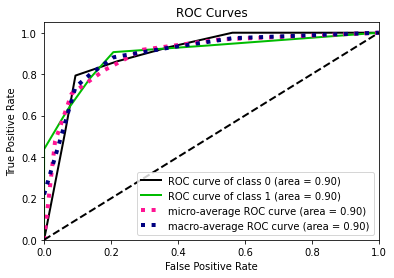

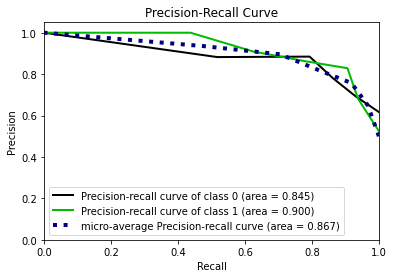

In [ ]:
best_estimator.fit(x_train, y_train)
y_score = best_estimator.predict_proba(x_test)
fpr0, tpr0, thresholds = roc_curve(y_test, y_score[:, 1])
# Plot metrics
plot_roc(y_test, y_score)
plt.show()

plot_precision_recall(y_test, y_score)
plt.show()